In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import chameleon as c
import time

# Calibration with $\sigma = -xt$

In [2]:
def sig_a(env, t):
    """
    Function to specify active stress as a function of time.
    We need to take in the environment so that we can get the
    x postion.
    """
    x = env.pos_init
    return -x * t


def integrate_to_t(env, t):
    """Integrate the environment from 0 to t"""
    time_steps = int(t / env.dt)
    t_arr = np.linspace(0, t, time_steps)
    for t in t_arr:
        sig = sig_a(env, t)
        env.one_step_drag(sig)
    return

Computing numerical answer

In [3]:
t = 10
L = 10
C = 1
alpha = 1
E = 1
env = c.Chameleon(alpha=alpha, dt=0.001, init_length=L, E=E, C=1)
# analytic = u(env, t)
integrate_to_t(env, t)

Analytic answer from mathematica

In [4]:
a = [
    {0.0},
    {-23.3412},
    {-37.6824},
    {-43.0236},
    {-39.3647},
    {-26.7057},
    {-5.04674},
    {25.6123},
    {65.2714},
    {113.931},
    {171.59},
]
a = [s.pop() for s in a]

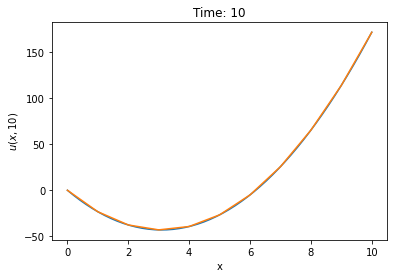

In [5]:
# plt.plot(env.pos_init, analytic)
plt.plot(env.pos_init, env.u_current)
plt.plot(a)
# plt.plot(env.pos_init, analytic)
plt.xlabel("x")
plt.ylabel(f"$u(x, {t})$")
# plt.legend(("drag", "no drag"))
plt.title(f"Time: {t}")
plt.show()

# Calibrate with $\sigma_a(x, t) = -sin^2(x)t$

In [19]:
def sig_a(env, t):
    """
    Function to specify active stress as a function of time.
    We need to take in the environment so that we can get the
    x postion.
    """
    x = env.pos_init
    return -(np.sin(x) ** 2) * t


def integrate_to_t(env, t):
    """Integrate the environment from 0 to t"""
    time_steps = int(t / env.dt)
    t_arr = np.linspace(0, t, time_steps)
    for t in t_arr:
        sig = sig_a(env, t)
        env.one_step_drag(sig)
    return

In [20]:
t = 10
L = 10
C = 1
alpha = 5
E = 20
env = c.Chameleon(alpha=alpha, dt=0.0001, init_length=L, E=E, C=C)
# analytic = u(env, t)
integrate_to_t(env, t)

In [21]:
a = [
    {0.0},
    {0.121},
    {0.555877},
    {0.729516},
    {0.806704},
    {1.22541},
    {1.45632},
    {1.50201},
    {1.88965},
    {2.17791},
    {2.20694},
]
a = [s.pop() for s in a]

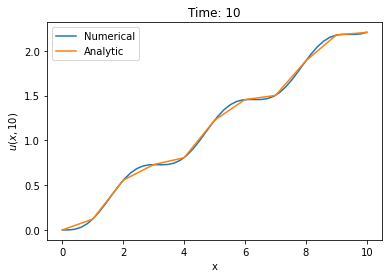

In [22]:
# plt.plot(env.pos_init, analytic)
plt.plot(env.pos_init, env.u_current)
plt.plot(np.linspace(0, 10, 11), a)
plt.xlabel("x")
plt.ylabel(f"$u(x, {t})$")
plt.legend(("Numerical", "Analytic"))
plt.title(f"Time: {t}")
plt.show()

# Calibrating with $\sigma_a = -sin^2(x)sin^2(t) -1$ 

In [10]:
def sig_a(env, t):
    """
    Function to specify active stress as a function of time.
    We need to take in the environment so that we can get the
    x postion.
    """
    x = env.pos_init
    return -(np.sin(x) ** 2) * (np.sin(t) ** 2) - 1


def integrate_to_t(env, t):
    """Integrate the environment from 0 to t"""
    time_steps = int(t / env.dt)
    t_arr = np.linspace(0, t, time_steps)
    for t in t_arr:
        sig = sig_a(env, t)
        env.one_step_drag(sig)
    return

In [11]:
t = 10
L = 10
C = 1
alpha = 5
E = 1
env = c.Chameleon(alpha=alpha, dt=0.5, init_length=L, E=E, C=C)
# analytic = u(env, t)
integrate_to_t(env, t)

In [12]:
a = [
    {0.0},
    {0.516557},
    {1.2815},
    {1.83972},
    {2.3216},
    {3.07375},
    {3.67729},
    {4.13425},
    {4.86182},
    {5.51074},
    {5.95451},
]
a = [s.pop() for s in a]

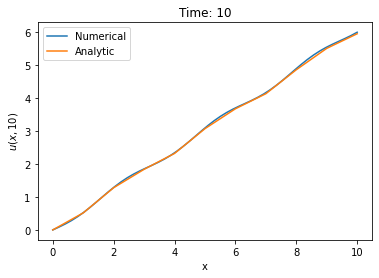

In [13]:
# plt.plot(env.pos_init, analytic)
plt.plot(env.pos_init, env.u_current)
plt.plot(np.linspace(0, 10, 11), a)
plt.xlabel("x")
plt.ylabel(f"$u(x, {t})$")
plt.legend(("Numerical", "Analytic"))
plt.title(f"Time: {t}")
plt.show()